#### ♣♣♣ 다중분류를 위한 OvO ♣♣♣
- OvO(One-vs-One) 즉, 1:1 방식 2진 분류기 구성
- 2진 분류기 개수가 많아짐 
- 균형 데이터 분류 가능함!

[1] 모듈 로딩 및 데이터 준비<hr>

In [2]:
### 모듈로딩 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import pandas as pd 
import numpy as np 

# 판다스/넘파이에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)


- 데이터셋 load_digits
    * 내장 데이터셋
    * 이미지 데이터셋 => 8 * 8 크기 이미지 ==> 1D으로 64개 피쳐
    * 이미지 라벨/타겟 => 숫자 0 ~ 9까지 즉, 총 10개 클래스 
    * 흑백 이미지

In [3]:
## 데이터 로딩
featureDF, targetSR = load_digits(as_frame=True, return_X_y=True)

# 이미지 픽셀 : 0 ~ 255 범위 
featureDF = featureDF/255

print(featureDF.shape, featureDF.ndim, targetSR.shape, targetSR.ndim)

(1797, 64) 2 (1797,) 1


In [4]:
featureDF.head(1), targetSR.head(), targetSR.index

(   pixel_0_0  pixel_0_1  pixel_0_2  ...  pixel_7_5  pixel_7_6  pixel_7_7
 0    0.00000    0.00000    0.01961  ...    0.00000    0.00000    0.00000
 
 [1 rows x 64 columns],
 0    0
 1    1
 2    2
 3    3
 4    4
 Name: target, dtype: int64,
 RangeIndex(start=0, stop=1797, step=1))

(8, 8)


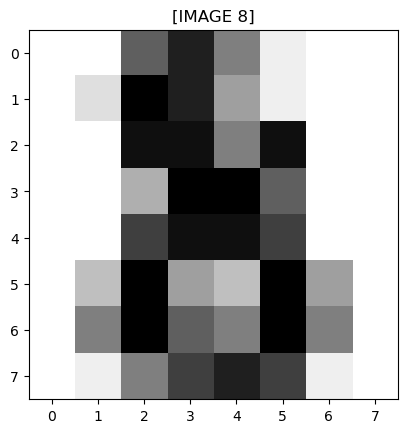

In [5]:
## 이미지 데이터 시각화 
import matplotlib.pyplot as plt 

# 1D ==> 2D 형태로 이미지 데이터
imgData=featureDF.iloc[-1].to_numpy().reshape(-1, 8)
print(imgData.shape)

# 시각화
plt.imshow(imgData, cmap='binary')
plt.title(f'[IMAGE {targetSR[1796]}]')
plt.show()

- 학습용 데이터셋 준비 : trainDS, testDS

In [6]:
X_train, X_test, y_train , y_test =  train_test_split(featureDF, 
                                                      targetSR,
                                                      stratify=targetSR,
                                                      random_state=10)

In [7]:
featureDF.describe(), y_train[y_train.index[0]]

(       pixel_0_0  pixel_0_1  pixel_0_2  ...  pixel_7_5  pixel_7_6  pixel_7_7
 count 1797.00000 1797.00000 1797.00000  ... 1797.00000 1797.00000 1797.00000
 mean     0.00000    0.00119    0.02041  ...    0.02653    0.00811    0.00143
 std      0.00000    0.00356    0.01865  ...    0.02314    0.01604    0.00729
 min      0.00000    0.00000    0.00000  ...    0.00000    0.00000    0.00000
 25%      0.00000    0.00000    0.00392  ...    0.00000    0.00000    0.00000
 50%      0.00000    0.00000    0.01569  ...    0.02353    0.00000    0.00000
 75%      0.00000    0.00000    0.03529  ...    0.04706    0.00784    0.00000
 max      0.00000    0.03137    0.06275  ...    0.06275    0.06275    0.06275
 
 [8 rows x 64 columns],
 np.int64(3))

- OvO(One vs One) 방식 2진 분류기 생성<hr>

In [8]:
# 모듈로딩
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier

## 45개의 2진 분류기 모델 생성됨
ovo_clf = OneVsOneClassifier(KNeighborsClassifier())
ovo_clf.fit(X_train,y_train)

,estimator,KNeighborsClassifier()
,n_jobs,None
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [9]:
# 모델 파라미터
print(f'ovr_clf.estimators_ : {len(ovo_clf.estimators_)}개' )
print(f'ovr_clf.classes_    : {ovo_clf.classes_}' )
print(f'ovr_clf.classes_    : {ovo_clf.n_classes_ }' )

ovr_clf.estimators_ : 45개
ovr_clf.classes_    : [0 1 2 3 4 5 6 7 8 9]
ovr_clf.classes_    : 10
